In [1]:
import random
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
label=df['label']
image_data=df.drop(['label'],axis=1)

In [4]:
image_data=np.array(image_data)
label=np.array(label)

In [5]:
image_data.shape

(42000, 784)

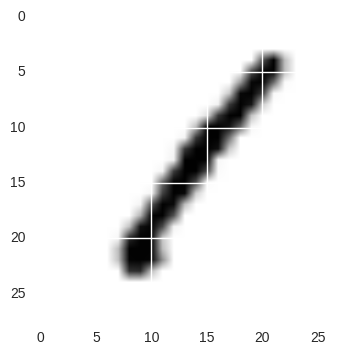

In [6]:
plt.imshow(image_data[0].reshape((28, 28)))

In [7]:
classifier=np.array([[0.0 for i in range(784)] for j in range(10)],dtype=np.float)
count=np.array([0 for i in range(10)])

In [8]:
for i in range(len(label)):
    classifier[label[i]]+=image_data[i]
    count[label[i]]+=1

In [9]:
for i in range(len(count)):
    classifier[i]/=float(count[i])

In [10]:
test=pd.read_csv('test.csv')

In [11]:
test=np.array(test)

In [20]:
len(answer)

9

In [ ]:
from collections import Counter
answer=[]
batch=0
count=0
o=time.time()
for i in test:
    x=image_data-i
    x=np.square(x)
    x=x.sum(axis=1)
    y=x.argsort()[0:3]
    c = Counter(label[y])
    y_pred = c.most_common(1)[0][0]
    answer.append(y_pred)
    if count==200:
        batch+=1
        print batch,time.time()-o
        o=time.time()
        count=0

In [57]:
result=pd.DataFrame()

In [58]:
result['ImageId']=np.arange(1,len(answer)+1)
result['Label']=answer

In [59]:
result.to_csv('result.csv',index=False)

In [46]:
len(answer)

28000

In [143]:
classifier.dot(np.array([100 for i in range(784)]))


array([ 3463240.75508228,  1518846.62681469,  2987109.93536031,
        2832018.8002758 ,  2423272.24950884,  2583592.04216074,
        2773491.73313996,  2293124.42626676,  3018414.84125031,  2455375.        ])

In [164]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(image_data, label) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
answer=neigh.predict(test)